# Explore here

## Table of Content

#### Exploratory Data Analysis

* 0. Importing Libraries
* 1. Problem statement and data collection
* 2. Exploration and data cleaning
* 3. Analysis
    * 3.1. Univariate Analysis
        * 3.1.2 Numerical
    * 3.2. Multivariate Analysis

### Exploratory Data Analysis (EDA)

#### 0. Importing Libraries

In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import json
from pickle import dump

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

#### 1. Problem Statement and Data Collection

* ##### Goal

To predict if the patient may or may not develop diabetes according to the following variables.

* ##### Variables

Pregnancies: Number of times the patient has been pregnant (numerical).

Glucose: Plasma glucose concentration measured two hours after an oral glucose tolerance test (numerical).

BloodPressure: Diastolic blood pressure measured in mm Hg (numerical).

SkinThickness: Triceps skinfold thickness measured in mm (numerical).

Insulin: Two-hour serum insulin level measured in μU/mL (numerical).

BMI: Body Mass Index (numerical).

DiabetesPedigreeFunction: Diabetes pedigree function, representing the genetic predisposition to diabetes (numerical).

Age: Patient’s age (numerical).

Outcome: Target variable indicating diabetes status (0 = no diabetes, 1 = diabetes) (numerical).

### Data Collection

In [20]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
df = pd.read_csv(url)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Understanding the data

In [21]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
# Analyze the types of information we have
print("Data types present in the dataset:", df.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
categorical_vars = df.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('int64') dtype('float64')]
Number of categorical variables: 0
Categorical variables: []


Number of numerical variables: 9
Numerical variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [23]:
df.shape
print(f"Number of columns is:{df.shape}")

Number of columns is:(768, 9)


This DataFame is composed by 768 rows and 9 columns (variables).
The data has:
9 numerical variables

### Duplicates deletion

In [24]:
df.duplicated().sum()
df= df.drop_duplicates()

After checking for duplicated rows, no duplicated records were found in the dataset. This indicates that each observation represents a unique patient, so no rows needed to be removed at this stage.

### Columns Dropping

No columns were dropped from the dataset. All features are medically relevant and potentially informative for predicting diabetes. Each variable represents a meaningful clinical measurement or patient characteristic, and removing any of them at this stage could result in the loss of valuable information.

## Analysis of numerical variables

In [25]:
total_dataf = df

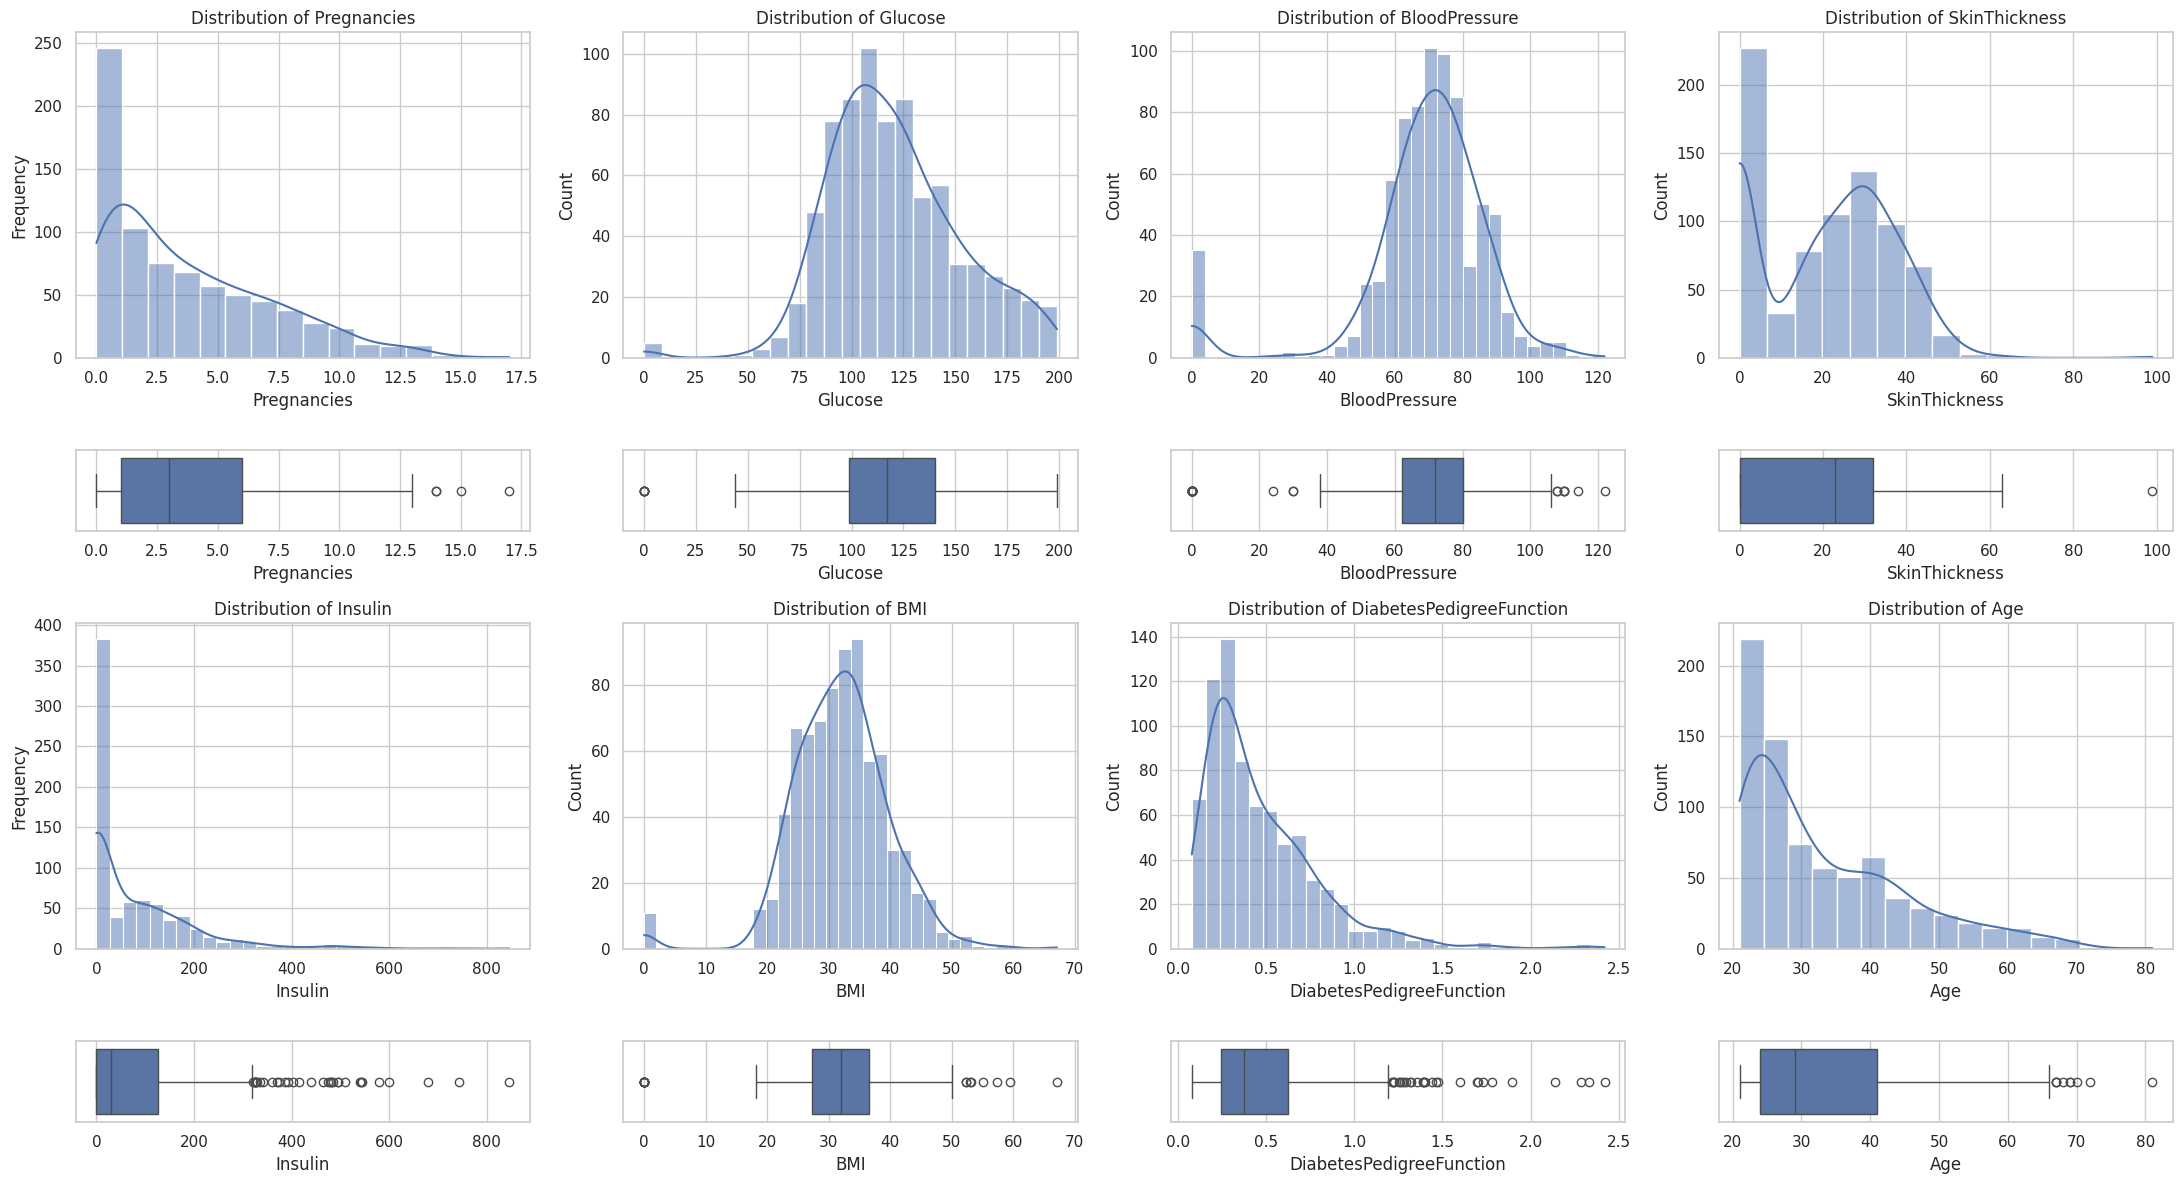

In [26]:
fig, axis = plt.subplots(
    4, 4,
    figsize=(22, 12),
    gridspec_kw={'height_ratios': [4, 1, 4, 1]}
)

# -------------------------
# ROW 0-1 (top block)
# -------------------------

# Pregnancies
sns.histplot(data=df, x="Pregnancies", ax=axis[0, 0], kde=True)
sns.boxplot(data=df, x="Pregnancies", ax=axis[1, 0])
axis[0, 0].set_title("Distribution of Pregnancies")
axis[1, 0].set_xlabel("Pregnancies")
axis[0, 0].set_ylabel("Frequency")

# Glucose
sns.histplot(data=df, x="Glucose", ax=axis[0, 1], kde=True)
sns.boxplot(data=df, x="Glucose", ax=axis[1, 1])
axis[0, 1].set_title("Distribution of Glucose")
axis[1, 1].set_xlabel("Glucose")

# BloodPressure
sns.histplot(data=df, x="BloodPressure", ax=axis[0, 2], kde=True)
sns.boxplot(data=df, x="BloodPressure", ax=axis[1, 2])
axis[0, 2].set_title("Distribution of BloodPressure")
axis[1, 2].set_xlabel("BloodPressure")

# SkinThickness
sns.histplot(data=df, x="SkinThickness", ax=axis[0, 3], kde=True)
sns.boxplot(data=df, x="SkinThickness", ax=axis[1, 3])
axis[0, 3].set_title("Distribution of SkinThickness")
axis[1, 3].set_xlabel("SkinThickness")

# -------------------------
# ROW 2-3 (bottom block)
# -------------------------

# Insulin
sns.histplot(data=df, x="Insulin", ax=axis[2, 0], kde=True)
sns.boxplot(data=df, x="Insulin", ax=axis[3, 0])
axis[2, 0].set_title("Distribution of Insulin")
axis[3, 0].set_xlabel("Insulin")
axis[2, 0].set_ylabel("Frequency")

# BMI
sns.histplot(data=df, x="BMI", ax=axis[2, 1], kde=True)
sns.boxplot(data=df, x="BMI", ax=axis[3, 1])
axis[2, 1].set_title("Distribution of BMI")
axis[3, 1].set_xlabel("BMI")

# DiabetesPedigreeFunction
sns.histplot(data=df, x="DiabetesPedigreeFunction", ax=axis[2, 2], kde=True)
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=axis[3, 2])
axis[2, 2].set_title("Distribution of DiabetesPedigreeFunction")
axis[3, 2].set_xlabel("DiabetesPedigreeFunction")

# Age
sns.histplot(data=df, x="Age", ax=axis[2, 3], kde=True)
sns.boxplot(data=df, x="Age", ax=axis[3, 3])
axis[2, 3].set_title("Distribution of Age")
axis[3, 3].set_xlabel("Age")

plt.tight_layout()
plt.show()


### Conclusions – Numerical Variables Analysis

#### Right-Skewed Distributions
Several variables, such as Pregnancies, Insulin, DiabetesPedigreeFunction, and Age, present right-skewed distributions. Most observations are concentrated at lower values, while a smaller number of cases show unusually high values. This suggests that extreme measurements for these features are relatively rare within the dataset.

#### Approximately Normal Distributions
Variables like BloodPressure, SkinThickness, BMI, and Glucose display distributions closer to a normal (bell-shaped) form. These features tend to be more evenly distributed around their central values, with fewer extreme observations compared to the skewed variables.

#### Presence of Outliers
The boxplots reveal the presence of outliers across all numerical variables. Outliers are especially noticeable in Insulin, DiabetesPedigreeFunction, and Pregnancies, which may have a significant impact on model performance if not handled properly in later preprocessing steps.

#### Zero Values Interpretation
Several variables, particularly Insulin, SkinThickness, and BloodPressure, contain a considerable number of zero values. Since these measurements cannot realistically be zero from a physiological standpoint, these values likely represent missing or unrecorded data rather than true observations. This issue will need to be addressed during the data preprocessing phase.

Age Distribution
The Age variable shows a higher concentration of younger individuals, with most patients falling between 20 and 40 years old. Older age groups are less represented in the dataset, which could influence model generalization, especially when age-related risk factors are relevant for diabetes prediction.

## 4. Multivariate Analysis

### Encoding Categorical Values and Saving JSON files
Since our dataset contains only numerical variables, encoding categorical values is not applicable.

### Numerical-Numerical Analysis

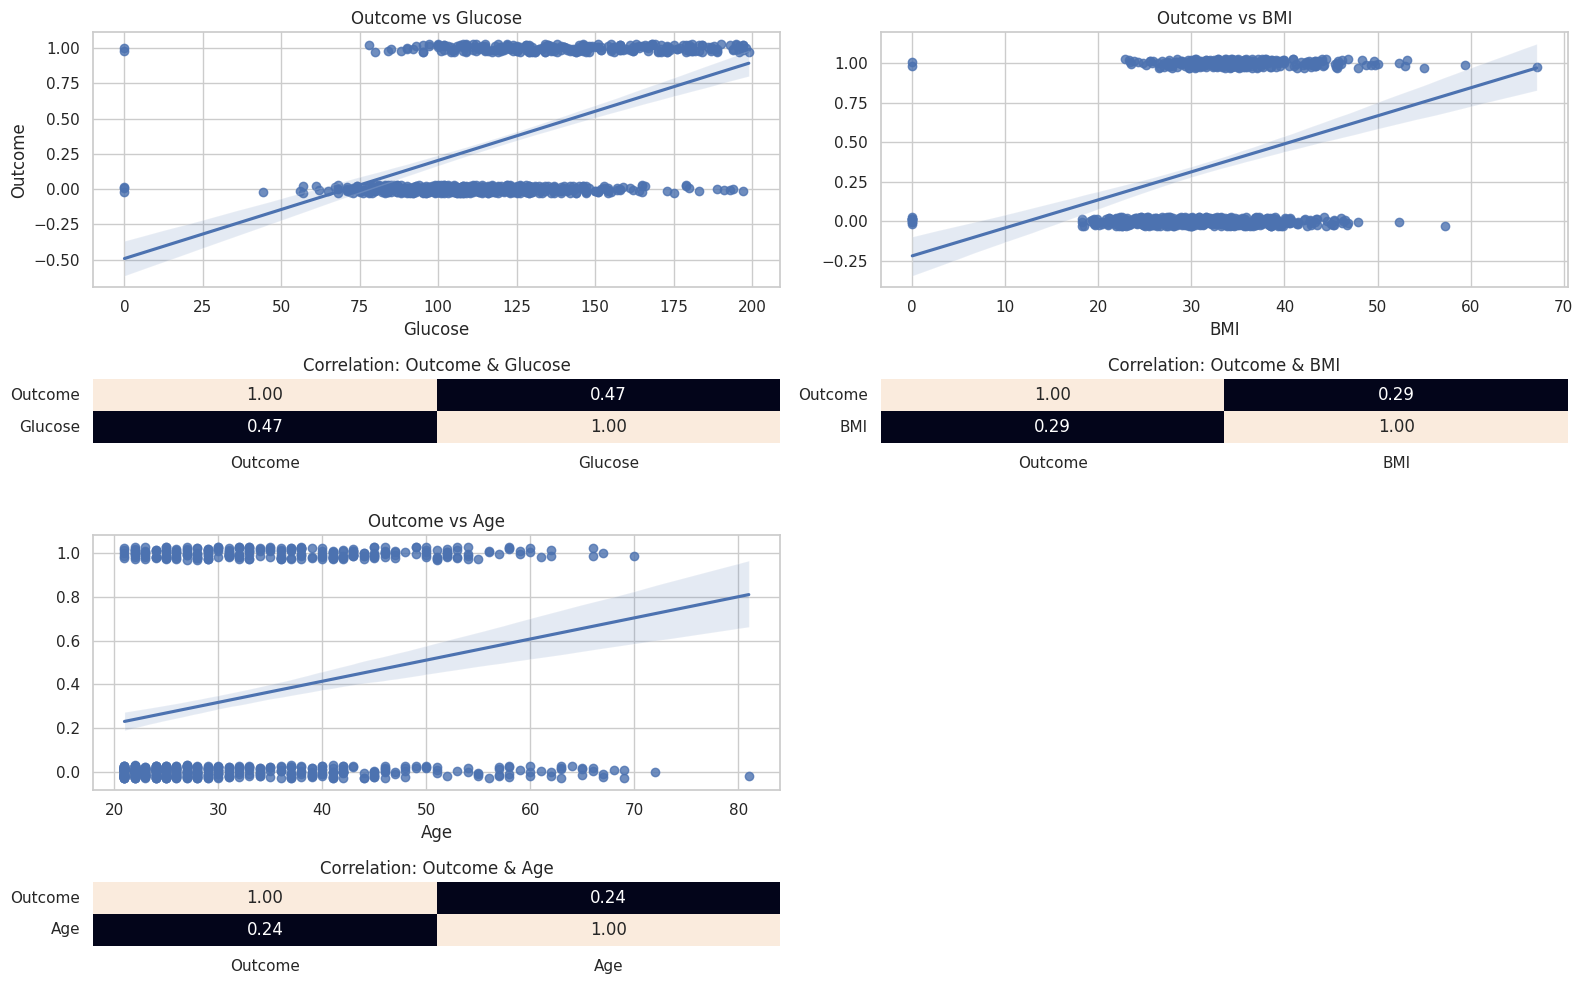

In [27]:

fig, axis = plt.subplots(
    4, 2,
    figsize=(16, 10),
    gridspec_kw={'height_ratios': [4, 1, 4, 1]}
)

# Outcome vs Glucose
sns.regplot(ax=axis[0, 0], data=df, x="Glucose", y="Outcome", y_jitter=0.03)
sns.heatmap(df[["Outcome", "Glucose"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

axis[0, 0].set_title("Outcome vs Glucose")
axis[1, 0].set_title("Correlation: Outcome & Glucose")
scatter_kws={"alpha": 0.4}


# Outcome vs BMI
sns.regplot(ax=axis[0, 1], data=df, x="BMI", y="Outcome", y_jitter=0.03).set(ylabel=None)
sns.heatmap(df[["Outcome", "BMI"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

axis[0, 1].set_title("Outcome vs BMI")
axis[1, 1].set_title("Correlation: Outcome & BMI")
scatter_kws={"alpha": 0.4}


# Outcome vs Age
sns.regplot(ax=axis[2, 0], data=df, x="Age", y="Outcome", y_jitter=0.03).set(ylabel=None)
sns.heatmap(df[["Outcome", "Age"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

axis[2, 0].set_title("Outcome vs Age")
axis[3, 0].set_title("Correlation: Outcome & Age")
scatter_kws={"alpha": 0.4}


# Eliminar los ejes que sobran (misma estructura)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()


## Conclusions

### Relationship with Glucose
The analysis shows a clear positive relationship between Glucose levels and the probability of having diabetes. As glucose values increase, the likelihood of a positive diabetes outcome also rises. This is confirmed both by the regression trend and the correlation coefficient, highlighting glucose as one of the most influential features in the dataset.

### Relationship with BMI
BMI presents a moderate positive association with the diabetes outcome. Higher BMI values tend to be linked with a greater probability of diabetes, although the relationship is less pronounced than for glucose. This suggests that body mass index is an important, but not exclusive, risk factor.

### Relationship with Age
The Age variable shows a weaker but still noticeable positive relationship with diabetes. Older individuals appear slightly more likely to have a positive outcome, which aligns with known medical knowledge about increased diabetes risk with age.

### General Observations
Although none of the variables alone perfectly separates diabetic from non-diabetic patients, the combined effect of glucose levels, BMI, and age provides valuable predictive information. These relationships justify their inclusion in the predictive model and motivate further feature engineering and model optimization.

#### Correlation Heat Map

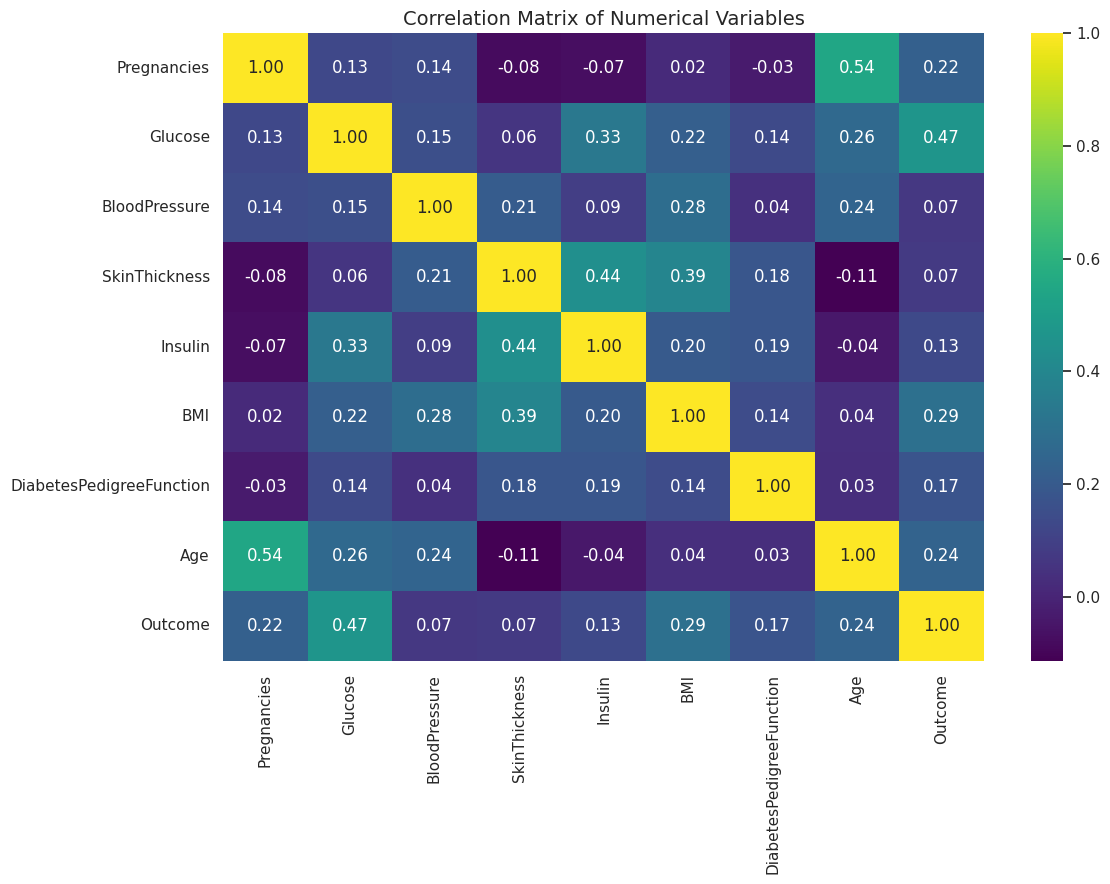

In [28]:
cols_num = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]

fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    df[cols_num].corr(method="pearson"),
    annot=True,
    fmt=".2f",
    cmap="viridis",
    ax=ax
)

ax.set_title("Correlation Matrix of Numerical Variables", fontsize=14)

plt.tight_layout()
plt.show()


### Conclusions

The correlation heatmap highlights several important relationships between the numerical variables and the diabetes outcome.

Glucose shows the strongest positive correlation with Outcome, confirming it as the most relevant feature for diabetes prediction. This result is consistent with medical knowledge and previous exploratory analyses.

BMI and Age present moderate positive correlations with the target variable, suggesting that higher body mass index and older age are associated with an increased likelihood of diabetes, although their individual influence is weaker than that of glucose.

Other variables, such as Pregnancies and DiabetesPedigreeFunction, exhibit weaker but still noticeable correlations with the outcome, indicating that they may contribute useful complementary information when combined with other features.

Overall, no single variable perfectly explains the target on its own. However, the observed correlation patterns justify the use of multiple features together in the predictive model and support the application of a decision tree to capture non-linear relationships between variables.

### *5. Feature Engineering


#Outliers Treatment


In [29]:
FINAL_COLS = ["Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"]
total_dataf = total_dataf[FINAL_COLS]
total_dataf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
import json

# Guardamos ambos datasets
total_data_CON_outliers = df.copy()
total_data_SIN_outliers = df.copy()

# Variables numéricas SIN el target
outliers_cols = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]

def replace_outliers(column, dataframe):
    
    col_stats = dataframe[column].describe()
    col_iqr = col_stats["75%"] - col_stats["25%"]
    
    upper_limit = round(float(col_stats["75%"] + 1.5 * col_iqr), 2)
    lower_limit = round(float(col_stats["25%"] - 1.5 * col_iqr), 2)

    # Evitar límites negativos si no tienen sentido fisiológico
    if lower_limit < 0:
        lower_limit = dataframe[column].min()

    # Cap superior
    dataframe[column] = dataframe[column].apply(
        lambda x: x if x <= upper_limit else upper_limit
    )

    # Cap inferior
    dataframe[column] = dataframe[column].apply(
        lambda x: x if x >= lower_limit else lower_limit
    )

    return dataframe.copy(), [lower_limit, upper_limit]


outliers_dict = {}

for column in outliers_cols:
    total_data_SIN_outliers, limits = replace_outliers(column, total_data_SIN_outliers)
    outliers_dict[column] = [float(limits[0]), float(limits[1])]

with open("../data/processed/outliers_dict.json", "w") as f:
    json.dump(outliers_dict, f, indent=4)



Values scalated

In [31]:
# Predictors and target
predictoras = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]
target = "Outcome"

# X and y for both datasets
X_CON = total_data_CON_outliers[predictoras]
X_SIN = total_data_SIN_outliers[predictoras]
y = total_data_CON_outliers[target]  # target stays the same

# Split (same random_state so both splits are comparable)
X_train_CON_outliers, X_test_CON_outliers, y_train, y_test = train_test_split(
    X_CON, y, test_size=0.2, random_state=10, stratify=y
)

X_train_SIN_outliers, X_test_SIN_outliers, _, _ = train_test_split(
    X_SIN, y, test_size=0.2, random_state=10, stratify=y
)


Min-Max Scaling

In [32]:
# ==============================
# MINMAX SCALER
# ==============================

# CON OUTLIERS
scaler_CON_outliers = MinMaxScaler()
scaler_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_scal = pd.DataFrame(
    scaler_CON_outliers.transform(X_train_CON_outliers),
    index=X_train_CON_outliers.index,
    columns=predictoras
)

X_test_CON_outliers_scal = pd.DataFrame(
    scaler_CON_outliers.transform(X_test_CON_outliers),
    index=X_test_CON_outliers.index,
    columns=predictoras
)

# SIN OUTLIERS
scaler_SIN_outliers = MinMaxScaler()
scaler_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_scal = pd.DataFrame(
    scaler_SIN_outliers.transform(X_train_SIN_outliers),
    index=X_train_SIN_outliers.index,
    columns=predictoras
)

X_test_SIN_outliers_scal = pd.DataFrame(
    scaler_SIN_outliers.transform(X_test_SIN_outliers),
    index=X_test_SIN_outliers.index,
    columns=predictoras
)


Feature Selection

When it comes to decision trees, this step is not necesary as the decision trees already perform this task. But in order of the academical project, I will add this step to it.

In [ ]:

import pickle
from sklearn.feature_selection import SelectKBest, f_classif

def kselection(X_train, X_test, y_train, k, type_df):

    selection_model = SelectKBest(score_func=f_classif, k=k)
    selection_model.fit(X_train, y_train)

    selected_cols = X_train.columns[selection_model.get_support()]

    X_train_sel = pd.DataFrame(
        selection_model.transform(X_train),
        index=X_train.index,
        columns=selected_cols
    )

    X_test_sel = pd.DataFrame(
        selection_model.transform(X_test),
        index=X_test.index,
        columns=selected_cols
    )

    # Guardamos el modelo DENTRO de la función
    with open(f"../data/interim/selection_model_{type_df}.pkl", "wb") as f:
        pickle.dump(selection_model, f)

    return X_train_sel, X_test_sel


In [34]:
# With outliers
X_train_CON_sel, X_test_CON_sel = kselection(
    X_train_CON_outliers, X_test_CON_outliers, y_train,
    k=6, type_df="CON_outliers"
)

# Without outliers
X_train_SIN_sel, X_test_SIN_sel = kselection(
    X_train_SIN_outliers, X_test_SIN_outliers, y_train,
    k=6, type_df="SIN_outliers"
)


Datasets Saves

In [ ]:
import os

os.makedirs("../data/processed", exist_ok=True) #Crea la carpeta en caso de que no exista
 
# Guardar datasets seleccionados 
X_train_CON_sel.to_csv("../data/processed/X_train_CON_sel.csv", index=False)
X_test_CON_sel.to_csv("../data/processed/X_test_CON_sel.csv", index=False)

X_train_SIN_sel.to_csv("../data/processed/X_train_SIN_sel.csv", index=False)
X_test_SIN_sel.to_csv("../data/processed/X_test_SIN_sel.csv", index=False)

# Guardar targets
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

print("✅ Saved: X_train/X_test (CON & SIN) + y_train/y_test as CSV in ../data/processed/")




✅ Saved: X_train/X_test (CON & SIN) + y_train/y_test as CSV in ../data/processed/


Saving Scalers

In [36]:

with open("../models/scaler_CON_outliers.pkl", "wb") as file:
    pickle.dump(scaler_CON_outliers, file)

with open("../models/scaler_SIN_outliers.pkl", "wb") as file:
    pickle.dump(scaler_SIN_outliers, file)
